In [ ]:
# import statements
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import spacy
import squarify

from collections import Counter
from spacy.tokenizer import Tokenizer
nlp = spacy.load("en_core_web_md")




In [2]:
df = pd.read_csv('./merged_df.csv')

In [5]:
df.head()

,name,flavors,race,positive_effects,negative_effects,medical_uses,Rating,Description
0,Afpak,"['Earthy', 'Chemical', 'Pine', 'Spicy/Herbal']",hybrid,"['Relaxed', 'Hungry', 'Happy', 'Sleepy', 'Crea...",['Dizzy'],"['Depression', 'Insomnia', 'Pain', 'Stress', '...",4.2,"Afpak, named for its direct Afghani and Pakist..."
1,African,"['Spicy/Herbal', 'Pungent', 'Earthy', 'Pepper']",sativa,"['Euphoric', 'Happy', 'Creative', 'Energetic',...",['Dry Mouth'],"['Depression', 'Pain', 'Stress', 'Lack of Appe...",3.9,African refers to the indigenous varieties of ...
2,Afternoon Delight,"['Pepper', 'Flowery', 'Pine', 'Pungent', 'Citr...",hybrid,"['Relaxed', 'Hungry', 'Euphoric', 'Uplifted', ...","['Dizzy', 'Dry Mouth', 'Paranoid']","['Depression', 'Insomnia', 'Pain', 'Stress', '...",4.8,"Afternoon Delight, created by Colorado Seed In..."
3,Afwreck,"['Pine', 'Earthy', 'Flowery', 'Pungent']",hybrid,"['Relaxed', 'Happy', 'Creative', 'Uplifted', '...","['Dizzy', 'Dry Mouth', 'Paranoid', 'Dry Eyes']","['Pain', 'Stress', 'Headache', 'Fatigue', 'Hea...",4.2,Afwreck is a hybrid cross of Afghani and Train...
4,Agent Orange,"['Citrus', 'Orange', 'Sweet', 'Earthy']",hybrid,"['Relaxed', 'Euphoric', 'Happy', 'Energetic', ...","['Dizzy', 'Dry Mouth', 'Paranoid', 'Dry Eyes']","['Depression', 'Pain', 'Stress', 'Nausea', 'He...",4.2,Don’t let the name scare you! The only herbici...


In [3]:
df['flavors'] =  df['flavors'].apply(lambda x: x.replace('[','').replace(']','')) 

In [4]:
df['flavors'] =  df['flavors'].apply(lambda x: x.replace("'",'').replace("'",'')) 

In [5]:
df['positive_effects'] = df['positive_effects'].apply(lambda x: x.replace('[','').replace(']','')) 

In [6]:
df['positive_effects'] = df['positive_effects'].apply(lambda x: x.replace("'",'').replace("'",'')) 

In [7]:
df['negative_effects'] = df['negative_effects'].apply(lambda x: x.replace('[','').replace(']','')) 

In [8]:
df['negative_effects'] = df['negative_effects'].apply(lambda x: x.replace("'",'').replace("'",'')) 

In [9]:
df['medical_uses'] = df['medical_uses'].apply(lambda x: x.replace('[','').replace(']','')) 

In [10]:
df['medical_uses'] = df['medical_uses'].apply(lambda x: x.replace("'",'').replace("'",'')) 

In [ ]:
df['Description'] = df['Description'].str.replace('\xa0', ' ')

In [20]:
df['Description'] = df['Description'].str.replace(r"[\"\',]", '')

In [16]:
df['Description'].replace({'\"': "\'"}, regex=True)

0       Afpak, named for its direct Afghani and Pakist...
1       African refers to the indigenous varieties of ...
2       Afternoon Delight, created by Colorado Seed In...
3       Afwreck is a hybrid cross of Afghani and Train...
4       Don’t let the name scare you! The only herbici...
                              ...                        
1490    Yummy is an indica-dominant hybrid that hails ...
1491    With a balanced ratio of THC and CBD, Zen is t...
1492    Zeta Sage is a sativa-dominant hybrid that com...
1493    Zkittlez is an indica-dominant mix of Grape Ap...
1494    Zoom Pie also known as Zombie Pie is a heavy i...
Name: Description, Length: 1495, dtype: object

In [11]:
df.Description = df.Description.str.replace(r'[\(\)\d#%/?]+', '')

In [12]:
df.flavors = df.flavors.str.replace(r'[\(\)\d#%/?]+', '')

In [16]:
df.head()

,name,flavors,race,positive_effects,negative_effects,medical_uses,Rating,Description
0,Afpak,"Earthy, Chemical, Pine, Spicy/Herbal",hybrid,"Relaxed, Hungry, Happy, Sleepy, Creative, Focused",Dizzy,"Depression, Insomnia, Pain, Stress, Lack of Ap...",4.2,"Afpak, named for its direct Afghani and Pakist..."
1,African,"Spicy/Herbal, Pungent, Earthy, Pepper",sativa,"Euphoric, Happy, Creative, Energetic, Talkativ...",Dry Mouth,"Depression, Pain, Stress, Lack of Appetite, Na...",3.9,African refers to the indigenous varieties of ...
2,Afternoon Delight,"Pepper, Flowery, Pine, Pungent, Citrus, Tropical",hybrid,"Relaxed, Hungry, Euphoric, Uplifted, Tingly, T...","Dizzy, Dry Mouth, Paranoid","Depression, Insomnia, Pain, Stress, Cramps, He...",4.8,"Afternoon Delight, created by Colorado Seed In..."
3,Afwreck,"Pine, Earthy, Flowery, Pungent",hybrid,"Relaxed, Happy, Creative, Uplifted, Sleepy, Eu...","Dizzy, Dry Mouth, Paranoid, Dry Eyes","Pain, Stress, Headache, Fatigue, Headaches, Mu...",4.2,Afwreck is a hybrid cross of Afghani and Train...
4,Agent Orange,"Citrus, Orange, Sweet, Earthy",hybrid,"Relaxed, Euphoric, Happy, Energetic, Uplifted","Dizzy, Dry Mouth, Paranoid, Dry Eyes","Depression, Pain, Stress, Nausea, Headache, He...",4.2,Don’t let the name scare you! The only herbici...


In [33]:
df.to_csv('final_df_percentsep.csv', sep='%')

In [178]:
df.isnull().sum()

name                 0
flavors              0
race                 0
positive_effects     0
negative_effects     0
medical_uses         0
Rating               0
Description         22
dtype: int64

In [5]:
df.dtypes

id                    int64
name                 object
flavors              object
race                 object
positive_effects     object
negative_effects     object
medical_uses         object
Rating              float64
Description          object
dtype: object

In [6]:
df['Description'].head()

0    Afpak, named for its direct Afghani and Pakist...
1    African refers to the indigenous varieties of ...
2    Afternoon Delight, created by Colorado Seed In...
3    Afwreck is a hybrid cross of Afghani and Train...
4    Don’t let the name scare you! The only herbici...
Name: Description, dtype: object

In [23]:
STOP_WORDS = nlp.Defaults.stop_words.union(['I', 'i','', ' ', '.', ',', '-', '  ', '   ', '    '])

In [8]:
# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [9]:
def tokenize(doc):
        """Return the tokens"""
        return [token.text for token in tokenizer(doc)]

In [11]:
# combine all text features into one string:

df['combined_text'] = df.name + df.flavors + df.positive_effects + df.negative_effects + df.medical_uses + df.Description
# Removing punctuations from our string
df["combined_text"] = df['combined_text'].str.replace('[^\w\s]',' ')

# remove leading white space:
df['combined_text_sans_race'] = df['combined_text'].str.strip()
df['Description'] = df['Description'].str.strip()
        
for desc in df['combined_text']:
    if desc == 'None':
       desc = np.nan
        
df = df.dropna()

In [31]:
df.isnull().sum()

id                    0
name                  0
flavors               0
race                  0
positive_effects      0
negative_effects      0
medical_uses          0
Rating                0
Description           0
combined_text         0
all_lemmas            0
description_lemmas    0
dtype: int64

In [12]:
df['combined_text'].head()

0    Afpak  Earthy    Chemical    Pine    Spicy Her...
1    African  Spicy Herbal    Pungent    Earthy    ...
2    Afternoon Delight  Pepper    Flowery    Pine  ...
3    Afwreck  Pine    Earthy    Flowery    Pungent ...
4    Agent Orange  Citrus    Orange    Sweet    Ear...
Name: combined_text, dtype: object

In [13]:
def get_lemmas(text):
        """Return the Lemmas"""
        lemmas = []
        doc = nlp(text)
    
        for token in doc: 
            if ((token.text.lower() not in STOP_WORDS) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
                lemmas.append(token.lemma_)
    
        return lemmas

In [24]:
df['all_lemmas'] = df['combined_text'].apply(get_lemmas)

In [25]:
df['all_lemmas'].head()

0    [Afpak, Earthy, Chemical, Pine, spicy, Herbal,...
1    [african, spicy, Herbal, pungent, earthy, Pepp...
2    [afternoon, Delight, Pepper, flowery, Pine, pu...
3    [Afwreck, Pine, earthy, flowery, pungent, rela...
4    [agent, Orange, Citrus, Orange, sweet, earthy,...
Name: all_lemmas, dtype: object

In [26]:
df['description_lemmas'] = df['Description'].apply(get_lemmas)

In [18]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [27]:
wc_overall = count(df['description_lemmas'])
wc_overall.head(20)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
19,strain,1154,1856,1.0,0.027136,0.027136,0.783435
49,,468,1027,2.0,0.015016,0.042152,0.317719
41,effect,811,975,3.0,0.014255,0.056408,0.550577
5,indica,661,884,4.0,0.012925,0.069333,0.448744
13,hybrid,725,846,5.0,0.012369,0.081702,0.492193
54,sativa,579,744,6.0,0.010878,0.092580,0.393075
94,cross,646,680,7.0,0.009942,0.102522,0.438561
14,aroma,609,633,8.0,0.009255,0.111777,0.413442
360,Kush,323,612,9.0,0.008948,0.120725,0.219280
30,dominant,580,596,10.0,0.008714,0.129439,0.393754


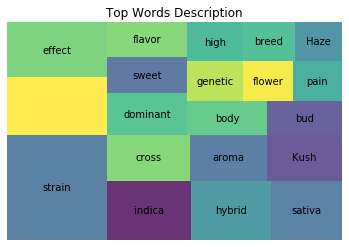

In [28]:
wc_top20 = wc_overall[wc_overall['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.title('Top Words Description')
plt.show()

In [29]:
wc_overall = count(df['all_lemmas'])
wc_overall.head(20)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
25,strain,1154,1856,1.0,0.018358,0.018358,0.783435
20,stress,1313,1509,2.0,0.014926,0.033285,0.891378
54,pain,1178,1473,3.0,0.014570,0.047855,0.799728
28,happy,1367,1450,4.0,0.014343,0.062197,0.928038
168,sweet,1035,1406,5.0,0.013907,0.076104,0.702648
64,euphoric,1240,1344,6.0,0.013294,0.089398,0.841819
18,depression,1207,1303,7.0,0.012888,0.102287,0.819416
47,relaxed,1246,1297,8.0,0.012829,0.115116,0.845893
86,Dry,1086,1086,9.0,0.010742,0.125858,0.737271
124,eye,943,997,10.0,0.009862,0.135720,0.640190


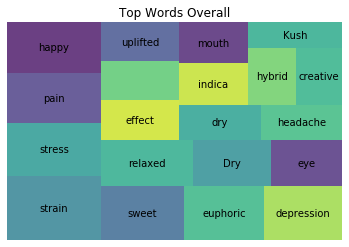

In [30]:
wc_top20 = wc_overall[wc_overall['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.title('Top Words Overall')
plt.show()